# 1. ZH C csoport - Összesen 10 pont - 90 perc áll rendelkezésre a megoldáshoz

## Azonosító adatok

- NÉV: Urbán Eszter Klára
- NEPTUN KÓD: HI4SQE
- EMAIL CÍM: urbaneszter2003@gmail.com

## Feladatok

### 1. Feladat (1. pont)

Az alábbi ábra egy lehetséges játék eredményének állását reprezentálja egy fa struktúrában az adott játékos szempontjából. 
Sorolja fel azokat a levél elemeket amelyek Alfa-Béta vágás algoritmusát használv nem kerülnek bejárásra.

<img src=" 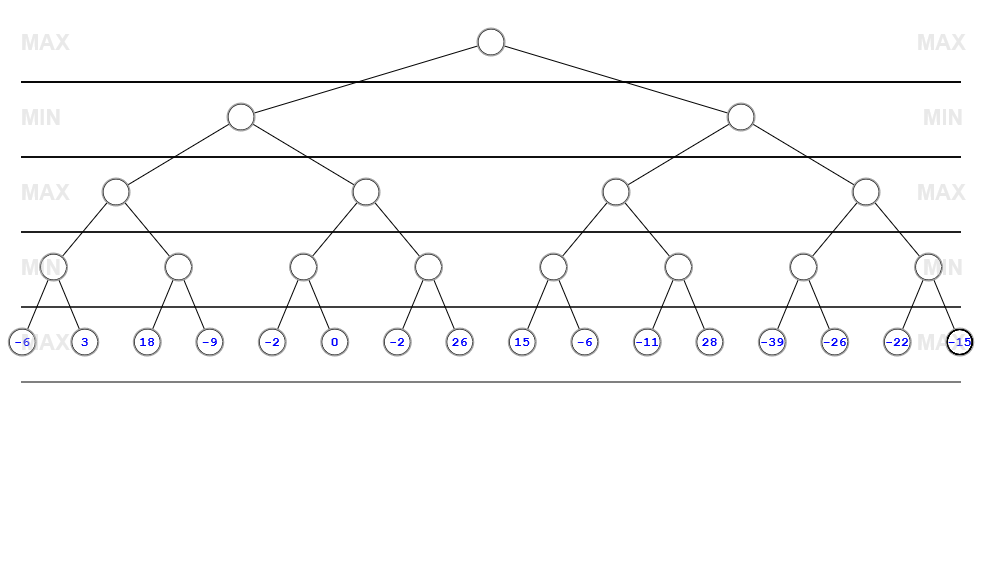" />

-2, 26, 28, -39, -26, -22, -15

### 2. Feladat  (5. pont)

Készíts egy Neurális hálózatott a megadott tervrajz alapján, ami betanul a fashion_mnist adathalmazon. Kövesse a feladat instrukcióit.

#### 2. Feladat - Adatok letöltése

In [159]:
import pandas as pd
import tensorflow_datasets as tfds
from tqdm import tqdm

In [160]:
dataset_train = tfds.load('fashion_mnist', split='train', shuffle_files=True)
dataset_test = tfds.load('fashion_mnist', split='test', shuffle_files=True)

#### 2. Feladat - Adatok konvertálása DataFrame-be

In [109]:
def convert_to_df(dataset):
    data = [{ 'image': item['image'].numpy(), 'label': item['label'].numpy() } for item in tqdm(dataset)]
    return pd.DataFrame(data)

df_train = convert_to_df(dataset_train)
df_test = convert_to_df(dataset_test)

100%|██████████| 10000/10000 [00:04<00:00, 2404.99it/s]


In [110]:
df_test["image"] = df_test["image"].apply(lambda x: x.flatten())
df_train["image"] = df_train["image"].apply(lambda x: x.flatten())
df_train.head()

,image,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 77, 227, 227, ...",2
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 59, 77, 58, 56,...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 127, 106, 13...",4
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 134, 171, 132, ...",1


#### 2. Feladata - Adatok vizualizálása (1. pont)

Írjon egy „víz” nevű függvényt, aminek 3 paramétere van egy test_img és test_label és size. A függvény jelenítsen meg egy véletlenül kiválasztott elemet.

In [111]:
import numpy as np
import matplotlib.pyplot as plt

def viz(test_img, test_label, size=(28, 28)):
    plt.imshow(test_img.reshape(size[0], size[1]), cmap="Greys")
    plt.axis('off')
    plt.title(str(test_label))
    plt.show()

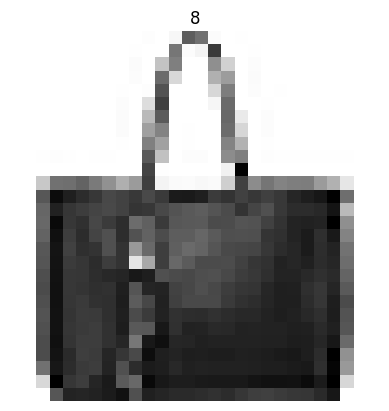

In [112]:
choice = np.random.choice(np.arange(len(df_train)))
viz(df_train["image"].values[choice], df_train["label"].values[choice])

#### 2. Feladat - Tanuló és teszt adatok előkészítése (1. pont)
Készítsd elő egy numpy array-be az input és címke adatokat (X,y) - bontásban. Ahol X prefix az input és y prefix a címke legyen a változó nevében.

In [113]:
train_test_split_no =  int(df_train.shape[1]*392)
train_test_split_no

784

In [114]:
X_train = df_train[:train_test_split_no]
y_train = df_train["label"].values[:train_test_split_no].astype(int)

X_test = df_test[train_test_split_no:]
y_test = df_test["label"].values[train_test_split_no:].astype(int)

In [115]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((784, 2), (784,), (9216, 2), (9216,))


#### 2. Feladat - One-hot enkódolja a címkéket (1. pont)

In [116]:
def one_hot_encode(x, num_labels):
  return np.eye(num_labels)[x]

In [117]:
y_train = one_hot_encode(y_train, 10)
y_test = one_hot_encode(y_test, 10)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((784, 2), (784, 10), (9216, 2), (9216, 10))

#### 2. Feladat - Építse fel a modellt. (1.pont)

<img src="    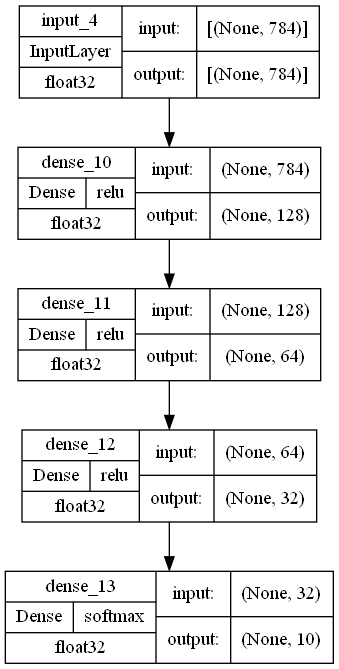" />

In [118]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input((X_train.shape[0])),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [119]:
model.compile(
    optimizer="adam", 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
)

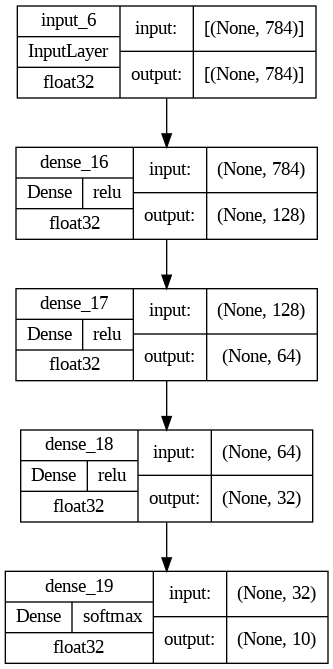

In [120]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

#### 2. Feladat - Tanítsa be és értékelje ki a modell a következő paraméterekkel. (1. pont)
- batch_size = 48 
- epoch = 7

In [121]:
model.fit(X_train, y_train, epochs=7, batch_size=48)

ValueError: ignored

In [122]:
model.evaluate(X_test, y_test)

ValueError: ignored

### 3. Feladat (4. pont)
Használd a Q-learning algoritmust, hogy kiképez egy ágenst ami megtalálja a laborintusban a legrövidebb utat.

#### 3. Feladat. Írd meg a Q-learning osztály action metódusát úgy a Q-learning szabályainak megfelelően. A labirintus megoldásához egy 3 dimenizós Q-táblát használt melynek dimenzióji a következő felépítésüek: (1. pont)
- 1. Sorok száma
- 2. Oszlopok száma
- 3. Cselekvések száma

In [126]:
import random
import numpy as np

class QLearningAgent:
    """
    A Q-learning ügynökünket képviselő osztály
    """
    def __init__(self, n_states_row,  n_states_cols, n_actions, learning_rate):
        self.n_states_row = n_states_row
        self.n_states_cols = n_states_cols
        self.n_actions = n_actions
        self.learning_rate = learning_rate
        
        self.q_table = np.zeros((self.n_states_row, self.n_states_cols, n_actions))
    
    def act(self, state_row, state_col, epsilon):
        # Generáljon véletlen számot a [0, 1] intervallumon
        random_int = random.uniform(0,1)
        action = 0
        
        if random_int > epsilon: 
            action = np.argmax(self.q_table[state_row][state_col])
        else:
            action = random.randint(0,self.n_actions-1)
        
        return action
    
    def learn(self, state_row, state_col, action, reward, new_state_row, new_state_col, gamma):
        old_value = self.q_table[state_row][state_col][action]
        new_estimate = reward + gamma * max(self.q_table[new_state_row][new_state_col]) 
        
        self.q_table[state_row][state_col][action] = old_value + self.learning_rate * (new_estimate- old_value)

#### 3. Feladat. Írd meg a play metódust amely elvégzi a labirntus kereső osztály tanulást a Q-Learning ágenst használva (1.5 pont)

In [149]:
from tqdm import tqdm
import matplotlib.pyplot as plt

class Maze():
    def __init__(self, epsilon, gamma, environment, aisles):
        self.epsilon = epsilon
        self.gamma = gamma
        self.agent = None
        self.aisles = aisles
        self.environment_rows = environment[0]
        self.environment_columns = environment[1]
        self.actions = ['up', 'right', 'down', 'left']
        self.rewards = np.full((self.environment_rows, self.environment_columns), -100.)
        self.rewards[0, 5] = 100.

        # Rewardok beállítása a folyosókhoz
        for row in range(1, self.environment_rows-1):
            for col in self.aisles[row]:
                self.rewards[row, col] = -1.
    
    def set_agent(self, agent):
        self.agent = agent

    def get_rewards(self):
        return self.rewards

    def viz(self, tabel):
        plt.imshow(tabel)
        plt.colorbar()
        plt.show()

    def viz_route(self, start_row, start_col):
        shortest_path = self.get_shortest_path(start_row, start_col)
        table = self.get_rewards().copy()
        for item in shortest_path:
            table[item[0]][item[1]] = 50
        
        self.viz(table)
        
    def is_terminal_state(self, row, col):
        """ Vég állapot vizsgálata"""
        if self.rewards[row, col] == -1.:
            return False
        else:
            return True
            
    def get_starting_location(self):
        """Nem terminális kezdőpont generálása"""
        row = np.random.randint(self.environment_rows)
        column = np.random.randint(self.environment_columns)

        # Ha terminális állapotot generálunk tovább probálkozunk
        while self.is_terminal_state(row, column):
            row = np.random.randint(self.environment_rows)
            column = np.random.randint(self.environment_columns)
        
        return row, column
    
    # define a function that will get the next location based on the chosen action
    def get_next_location(self, row, col, action):
        """Definiál egy függvényt, amely a következő helyet vissza adja a 
        kiválasztott művelet alapján"""
        new_row = row
        new_column = col
        if self.actions[action] == 'up' and row > 0:
            new_row -= 1
        elif self.actions[action] == 'right' and col < self.environment_columns - 1:
            new_column += 1
        elif self.actions[action] == 'down' and row < self.environment_rows - 1:
            new_row += 1
        elif self.actions[action] == 'left' and col > 0:
            new_column -= 1
        return new_row, new_column
  
    def get_shortest_path(self, start_row, start_column):
        """Vissza adja a legröbidebb utat"""       
        if self.is_terminal_state(start_row, start_column):
            return []
        else: 
            # Ha nem terminális a kezdő pont
            current_row, current_column = start_row, start_column
            shortest_path = []
            shortest_path.append([current_row, current_column])
            # Megyünk amíg terminálisig nem jutunk.
            while not self.is_terminal_state(current_row, current_column):
                action = np.argmax(self.agent.q_table[current_row][current_column])                
                current_row, current_column = self.get_next_location(current_row, current_column, action)
                shortest_path.append([current_row, current_column])
                
            return shortest_path

    def play(self, learning_step):
        """A tanulást végző metódus"""
        for episode in tqdm(range(learning_step)):
            new_row, new_column = self.get_starting_location()
            while not self.is_terminal_state(new_row, new_column):
              action = self.agent.select_action(new_row, new_column, self.epsilon)
              next_row, next_column = self.get_next_location(new_row, new_column, action)
              reward = self.rewards[next_row, next_column]
              #ToDo
              return NotImplementedError()

#### 3. Feladat - Maze osztály példányosítása

In [150]:
# Folyosók
aisles = {}
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 10)]
aisles[3].append(9)
aisles[4] = [1, 3, 7, 9]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(8)]

In [151]:
maze = Maze(epsilon = 0.9, gamma = 0.9, environment=(11,11), aisles = aisles)

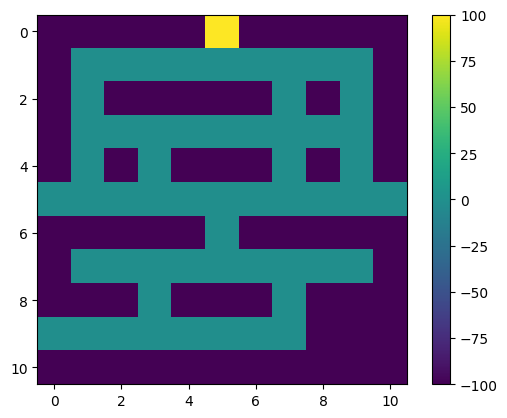

In [152]:
maze.viz(maze.get_rewards())

#### 3. Feladat - Q-Learning Ágens példányosítása

In [153]:
agent = QLearningAgent(
    n_states_row=11, 
    n_states_cols=11, 
    n_actions=len(maze.actions), 
    learning_rate=0.9)

maze.set_agent(agent)

agent.q_table[0][0]

array([0., 0., 0., 0.])

#### 3. Feladat - Tanítsd be az Ágenst 10000 lépessel (1. pont)

In [154]:
maze.__init__()

TypeError: ignored

In [157]:
maze.agent = QLearningAgent(n_states=maze.environment, n_actions=3, learning_rate=1.0)
maze.agent

AttributeError: ignored

In [158]:
rewards, epsilon_history = Maze.play(
    n_episodes=10_000,
    max_epsilon=1.0,
    min_epsilon=0.05,
    decay_rate=0.0001,
    gamma=0.95,
    learn=True,
    viz=False,
    human=False,
    log=False
)

TypeError: ignored

#### 3. Feladat - Vizualizáld a megadott kezdőponttal a tanulás eredményét (0.5. pont)

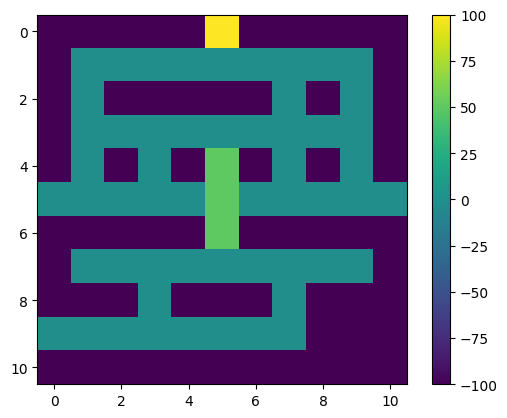

In [137]:
maze.viz_route(6, 5)